In [7]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]

pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity/'
simName = 'AccelGradient'

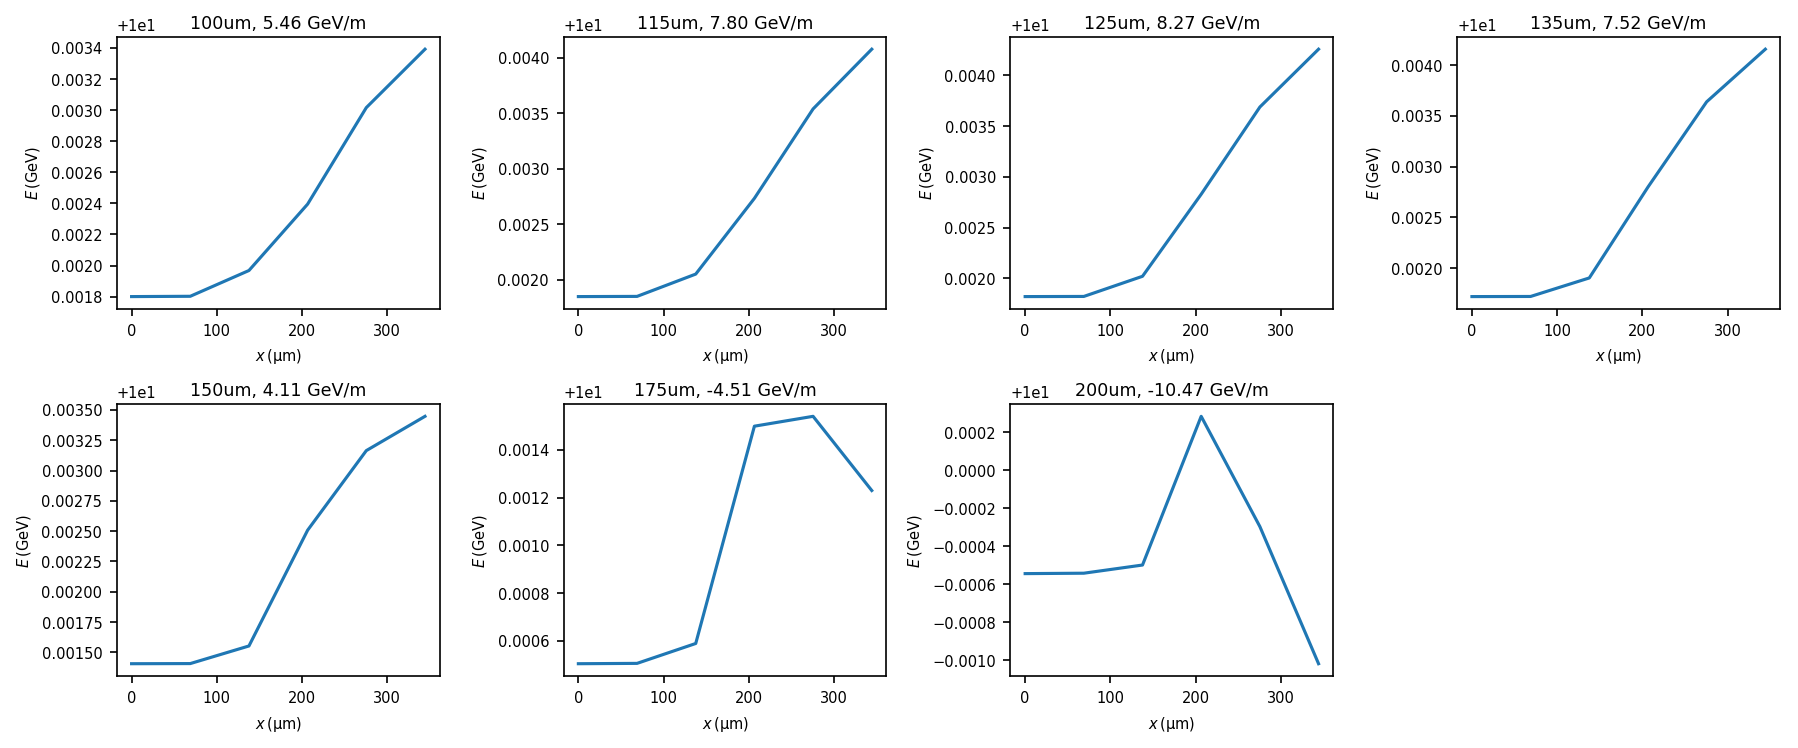

In [8]:
# Lets look at the different witness beams and see how their energy evolves
species = 'WitnessBeam'
sims = [
    '100um',
    '115um',
    '125um',
    '135um',
    '150um',
    '175um',
    '200um'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
grad = np.zeros(N, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 4)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        data = load.get_species_data(file, species)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        x[j] = c*attrs['time']
    grad[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    if i < 4: row = 0
    else: row = 1
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, energy)
    plt.title(sims[i]+', %0.2f GeV/m' % grad[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.tight_layout()
plt.show()

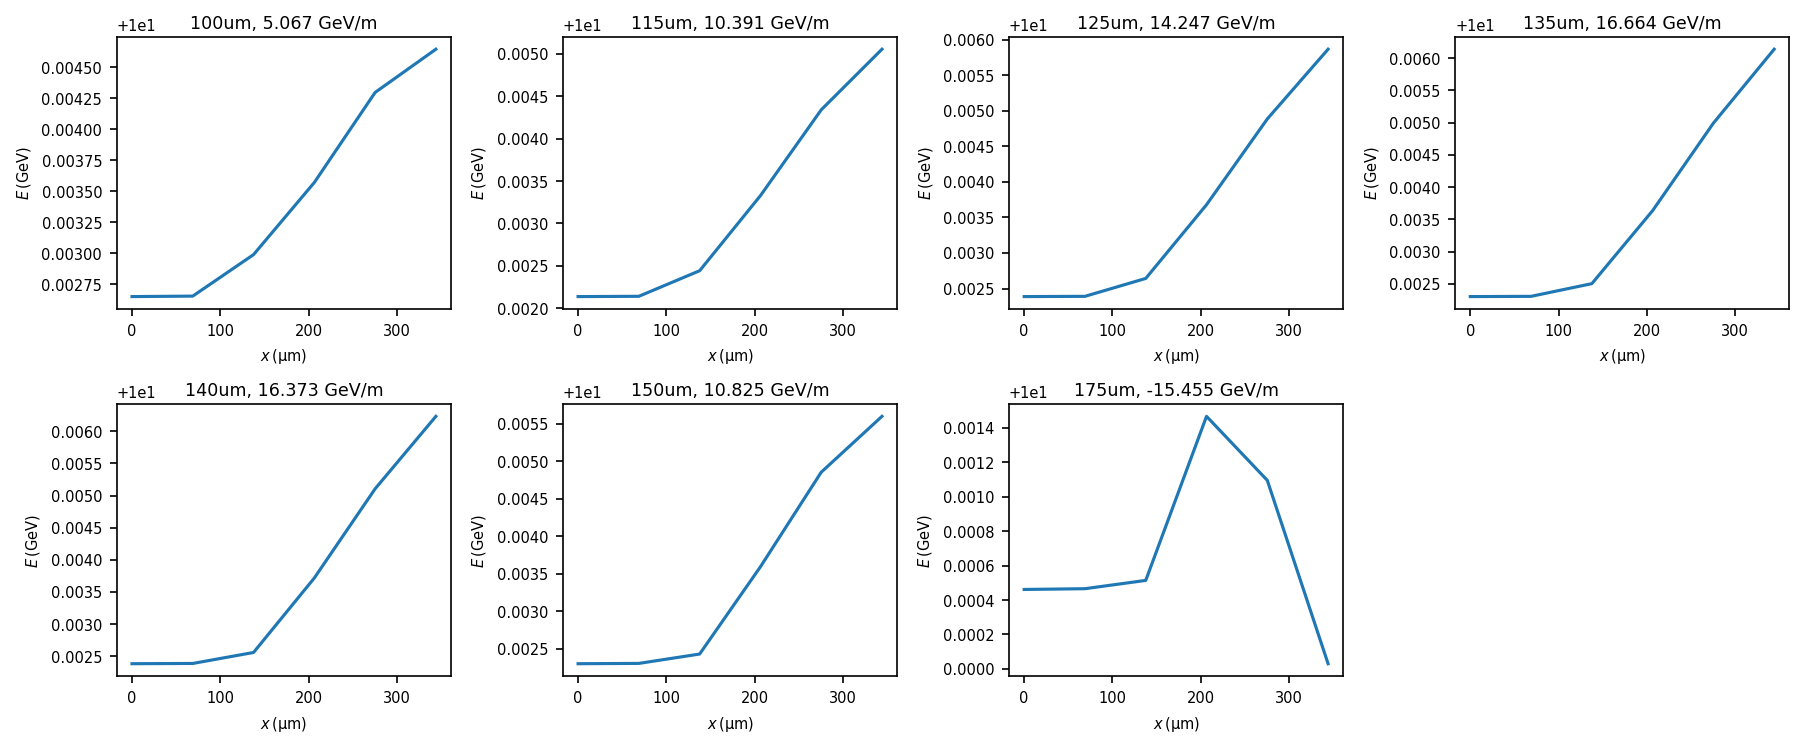

In [9]:
# Lets look at the different witness beams and see how their energy evolves
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity_18umWitness/'
species = 'WitnessBeam'
sims = [
    '100um',
    '115um',
    '125um',
    '135um',
    '140um',
    '150um',
    '175um'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
grad18 = np.zeros(N, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 4)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        data = load.get_species_data(file, species)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        x[j] = c*attrs['time']
    grad18[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    if i < 4: row = 0
    else: row = 1
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, energy)
    plt.title(sims[i]+', %0.3f GeV/m' % grad18[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.tight_layout()
plt.show()

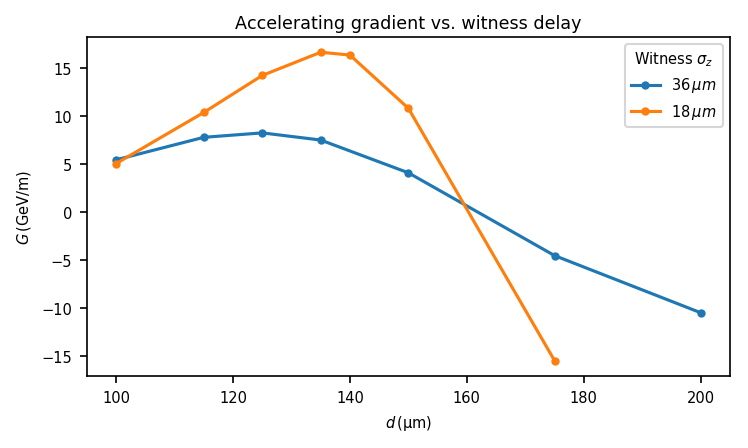

In [10]:
delay = [100, 115, 125, 135, 150, 175, 200]
delay18 = [100, 115, 125, 135, 140, 150, 175]
plt.figure(figsize=(5,3), dpi=150)
plt.plot(delay, grad, marker='o', markersize=3)
plt.plot(delay18, grad18, marker='o', markersize=3)
plt.title('Accelerating gradient vs. witness delay')
plt.xlabel(r'$d\,(\mathrm{\mu m})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend([r'$36\,\mu m$', r'$18\,\mu m$'], title=r'Witness $\sigma_z$')
plt.tight_layout()
plt.show()

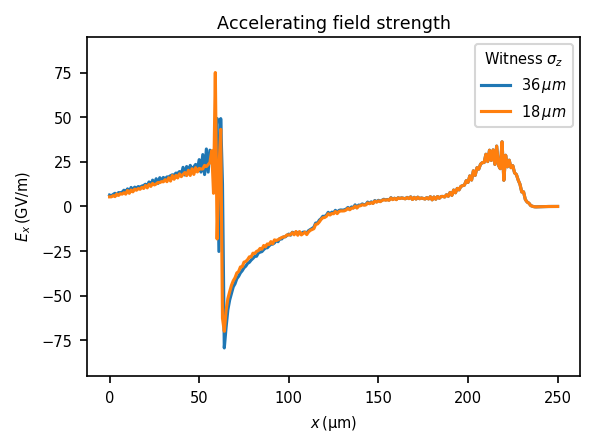

In [11]:
# Lets look at the difference in wake loading
# Same thing for the shorter propagation distance
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity/'
path = pathPre + '125um/'
Efield, Eattrs = load.load_field(path, simName, 'edgeE')
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity_18umWitness/'
path = pathPre + '125um/'
Efield18, Eattrs = load.load_field(path, simName, 'edgeE')
Nx, Ny, Nz = analyze.get_shape(Efield[2])
x = np.linspace(0, 250, Nx)

plt.figure(figsize=(4,3), dpi=150)
gs = gridspec.GridSpec(1, 1)
plt.subplot(gs[0, 0])
plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9)
plt.plot(x, Efield18[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9)
plt.title('Accelerating field strength')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend([r'$36\,\mu m$', r'$18\,\mu m$'], title=r'Witness $\sigma_z$')
plt.ylim([-95, 95])
plt.tight_layout()
plt.show()

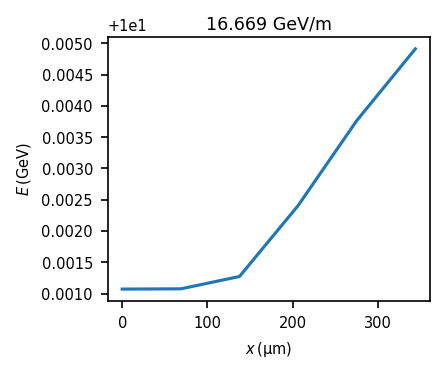

In [12]:
# Check if changing the emittance changes anything
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity_18umWitness/'
species = 'WitnessBeam'
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
plt.figure(figsize=(3, 2.5), dpi=150)
path = pathPre + '135um-5umrad/'
for j in range(6):
    file = plot.get_filename(path, simName, species, j)
    data = load.get_species_data(file, species)
    attrs = load.get_species_attrs(file, species)
    energy[j] = analyze.get_energy(data, me*1e-3)
    x[j] = c*attrs['time']
grad5um = (energy[5]-energy[4]) / (x[5]-x[4])
plt.plot(x*1e6, energy)
plt.title('%0.3f GeV/m' % grad5um)
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.tight_layout()
plt.show()

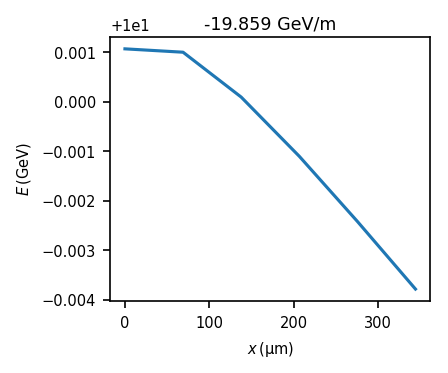

In [16]:
# Check if changing the emittance changes anything
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Witness_Beam_Delay/5e16PlasmaDensity_18umWitness/'
species = 'ElectronBeam'
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
plt.figure(figsize=(3, 2.5), dpi=150)
path = pathPre + '135um-5umrad/'
for j in range(6):
    file = plot.get_filename(path, simName, species, j)
    data = load.get_species_data(file, species)
    attrs = load.get_species_attrs(file, species)
    energy[j] = analyze.get_energy(data, me*1e-3)
    x[j] = c*attrs['time']
grad5um = (energy[5]-energy[4]) / (x[5]-x[4])
plt.plot(x*1e6, energy)
plt.title('%0.3f GeV/m' % grad5um)
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.tight_layout()
plt.show()

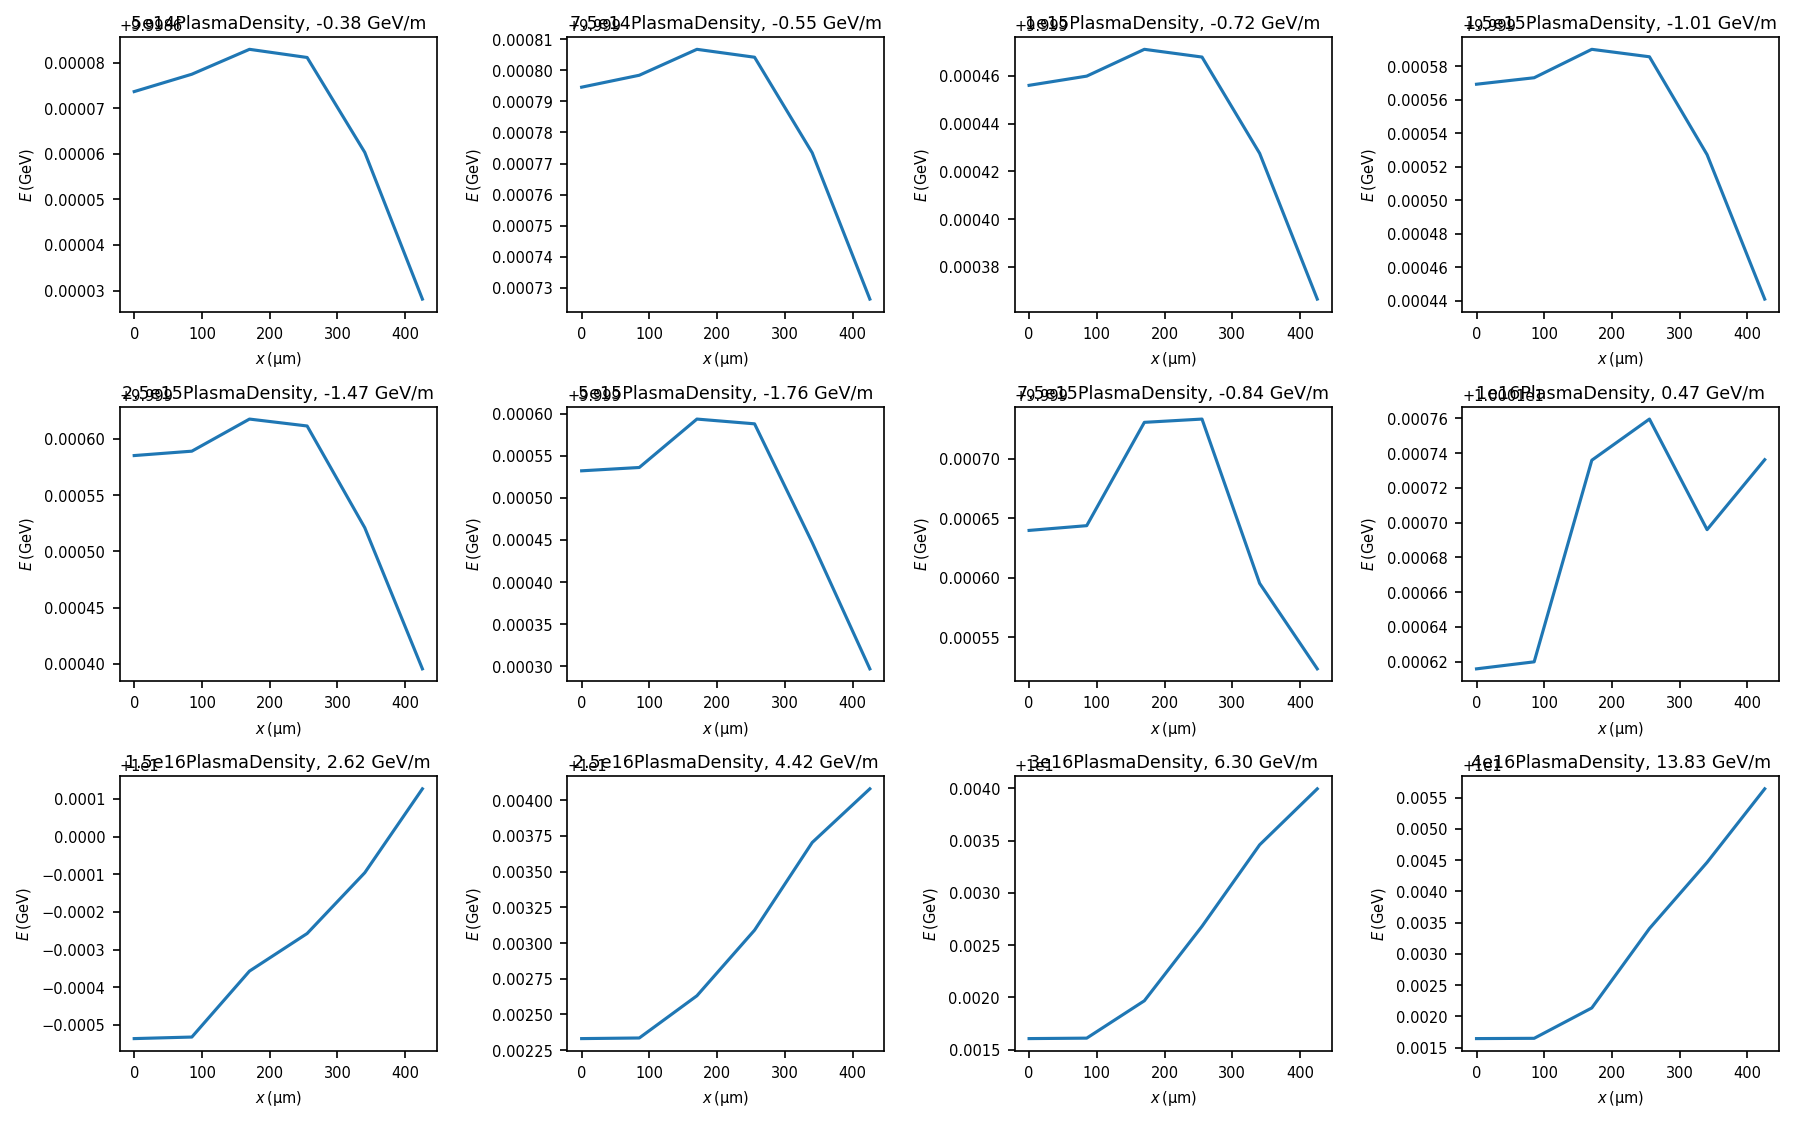

In [13]:
# Lets look at the different witness beams and see how their energy evolves
pathPre = '/mnt/md0/VSim/Matched_Accelerating_Gradient/Gradient_Scaling/'
species = 'WitnessBeam'
sims = [
    '5e14PlasmaDensity',
    '7.5e14PlasmaDensity',
    '1e15PlasmaDensity',
    '1.5e15PlasmaDensity',
    '2.5e15PlasmaDensity',
    '5e15PlasmaDensity',
    '7.5e15PlasmaDensity',
    '1e16PlasmaDensity',
    '1.5e16PlasmaDensity',
    '2.5e16PlasmaDensity',
    '3e16PlasmaDensity',
    '4e16PlasmaDensity'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
gradDen = np.zeros(N+1, dtype='double')
plt.figure(figsize=(12,7.5), dpi=150)
gs = gridspec.GridSpec(3, 4)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        data = load.get_species_data(file, species)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        x[j] = c*attrs['time']
    gradDen[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    if i < 4: row = 0
    elif i < 8: row = 1
    else: row = 2
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, energy)
    plt.title(sims[i]+', %0.2f GeV/m' % gradDen[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
plt.tight_layout()
plt.show()

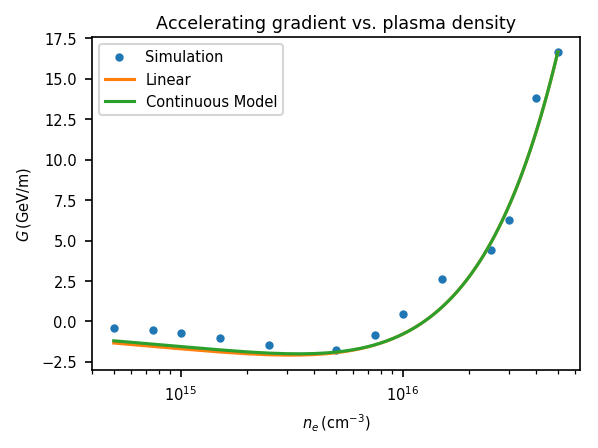

In [14]:
# Calculate the model to compare to actual data
denMod = np.linspace(5e14, 5e16, 100)
ne0 = 5e16
G0  = grad18[3]
def GA(ne, G0, ne0):
    return G0*np.sqrt(ne/ne0) * (2*np.sqrt(ne/ne0)-1)
def GD(ne, G0, ne0):
    return -G0*np.sqrt(ne/ne0) * np.sin(3*np.pi*np.sqrt(ne/ne0)/2)
gradMod = np.piecewise(denMod, [denMod > (4*ne0/9), denMod <= (4*ne0/9)], [GA, GA], G0, ne0)

def GAR(ne, G0, ne0):
    return G0*np.sqrt(ne/ne0) * (2*np.sqrt(ne/ne0)-1)
def GDR(ne, G0, ne0):
    return -G0*np.sqrt(ne/ne0) * np.cos(2*np.sqrt(ne/ne0)+np.pi/2-1)
gradModR = np.piecewise(denMod, [denMod > (ne0/4), denMod <= (ne0/4)], [GAR, GDR], G0, ne0)
    

den = [5e14, 7.5e14, 1e15, 1.5e15, 2.5e15, 5e15, 7.5e15, 1e16, 1.5e16, 2.5e16, 3e16, 4e16, 5e16]
gradDen[N] = grad18[3]
plt.figure(figsize=(4,3), dpi=150)
plt.plot(den, gradDen, marker='o', markersize=3, linestyle='none')
plt.plot(denMod, gradMod)
plt.plot(denMod, gradModR)
plt.title('Accelerating gradient vs. plasma density')
plt.xlabel(r'$n_e\,(\mathrm{cm^{-3}})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend([r'Simulation', r'Linear', r'Continuous Model'])
plt.xscale('log')
plt.tight_layout()
plt.show()

In [15]:
den = np.array(den, dtype='double')
y = gradDen
yM = np.piecewise(den, [den > (ne0/4), den <= (ne0/4)], [GAR, GDR], G0, ne0)
yA = np.average(y)
SSE = np.sum((y-yM)**2)
SSR = np.sum((yM-yA)**2)
SST = np.sum((y-yA)**2)
Rsq = 1-SSE/SST
MSE = SSE/(N+1)
RMSE = np.sqrt(MSE)
print('Sum of squares due to error: %0.2f ' % SSE)
print('R squared: %0.2f' % Rsq)
print('Root mean squared error: %0.2f GeV/m' % RMSE)

Sum of squares due to error: 12.99 
R squared: 0.97
Root mean squared error: 1.00 GeV/m
